# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: David Wang
### Student ID: 012368967
### Email address: davidwangdn@gmail.com


##  <u>References and sources </u>

regression.boston.ipynb

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [12]:
np.random.seed(42)

#### Code the solution

In [13]:
# Load data from CSV
df=pd.read_csv('homework3_input_data.csv', sep=',',header=0)
X = df[df.columns[5:12]]
Y = df['Happiness Score']
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
# Copy dataframe to new dataframe with needed columns
assignmentDF = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].copy()
assignmentDF['Happiness Score'] = Y
assignmentDF.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [15]:
assignmentDF.describe()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


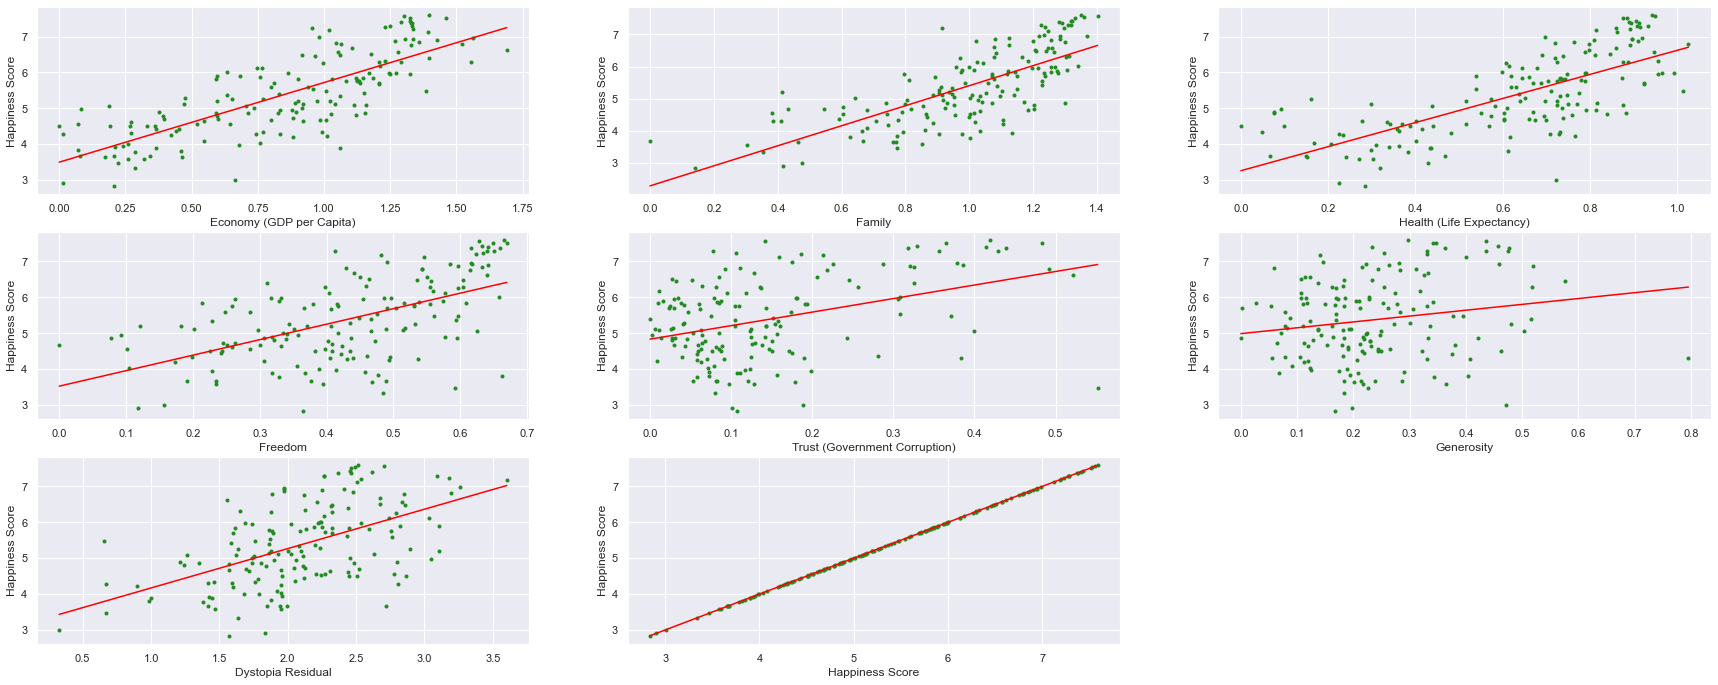

In [16]:
# Plot
plt.figure(figsize=(30,20))
for i, col in enumerate(assignmentDF.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = assignmentDF[col]
    y = assignmentDF['Happiness Score']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('Happiness Score')

<AxesSubplot:>

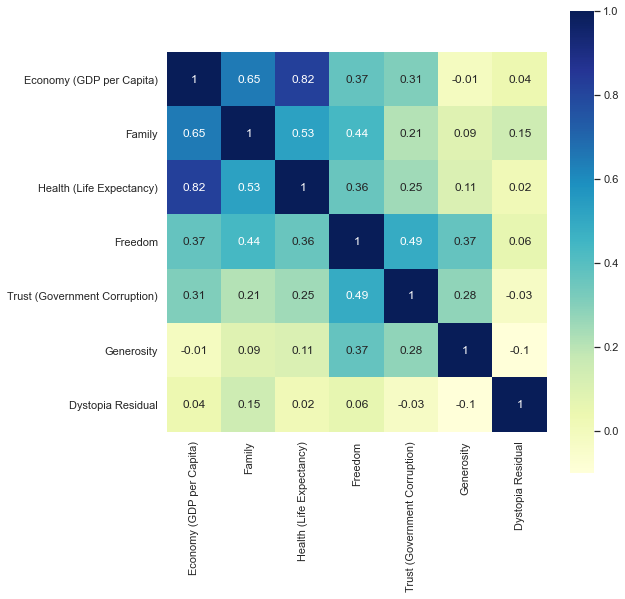

In [17]:
# Correlation Matrix
features = assignmentDF[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [18]:
# Train Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((126, 7), (126,), (32, 7), (32,))

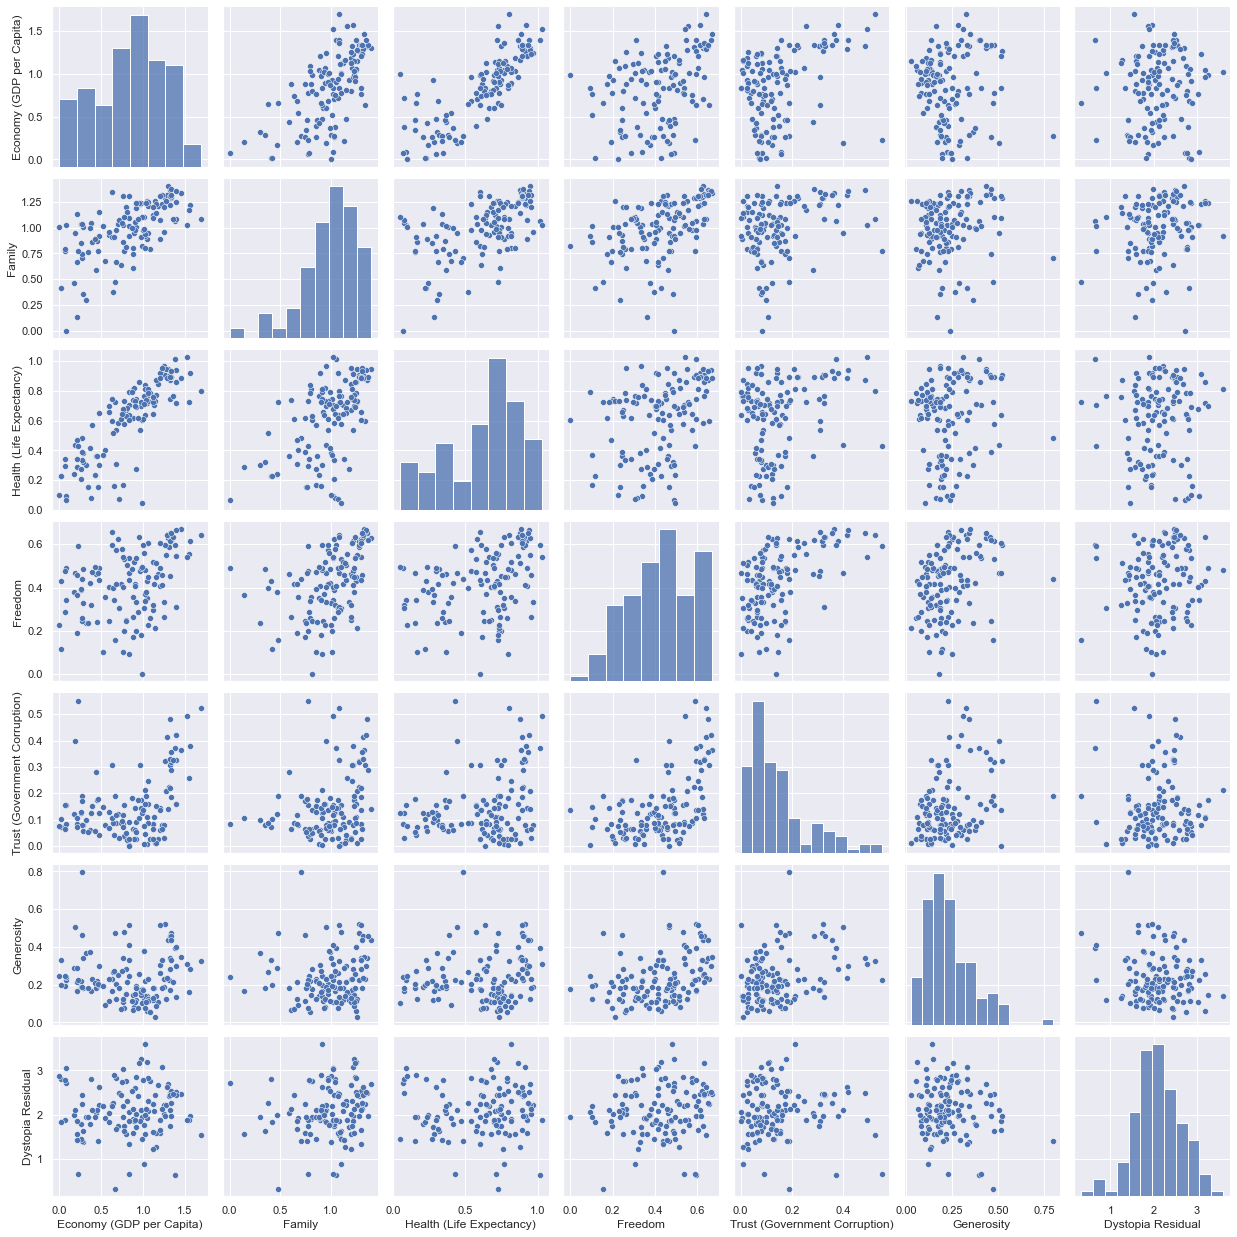

In [19]:
# Check to see what our training data looks like
train_df = pd.DataFrame(X_train,columns=assignmentDF.columns[0:7])
train_df['Happiness Score'] = Y_train
sns.pairplot(train_df, vars = assignmentDF.columns[0:7])

In [20]:
# Lienar Regression
model = linear_model.LinearRegression().fit(X_train, Y_train)
#model = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False).fit(X_train, Y_train)

In [21]:
# The coefficients:
print('Coefficients: \n', model.coef_)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [1.00010263 0.99995379 0.99986239 0.99968513 0.99990488 0.9999532
 1.00003023]
Mean squared error: 0.00
Coefficient of determination: 1.00


Text(0, 0.5, 'Predicted Y')

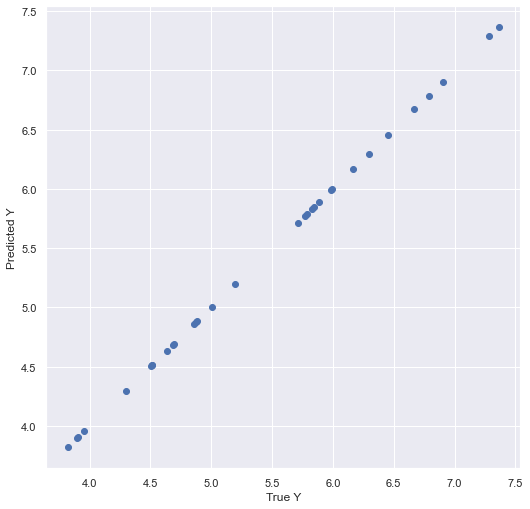

In [22]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')

In [23]:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test, Y_test_pred))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

Mean squared error: 0.00
Mean absolute error: 0.00
Root mean squared error: 0.00


In [24]:
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_test_pred})
pred_df.head()

,Actual,Predicted
7,7.364,7.363580
44,5.995,5.995093
113,4.633,4.633484
120,4.514,4.514380
63,5.716,5.715881
